In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#load data 
wood= pd.read_csv('/Users/Sunny/Documents/datasets/roller_coaster_starting/Golden_Ticket_Award_Winners_Wood.csv')
steel= pd.read_csv('/Users/Sunny/Documents/datasets/roller_coaster_starting/Golden_Ticket_Award_Winners_Steel.csv')
coasters= pd.read_csv('/Users/Sunny/Documents/datasets/roller_coaster_starting/roller_coasters.csv')

In [7]:
#Inspecting data frame 1 
wood.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [8]:
unique_coasters= wood['Name'].nunique()
print('There are : '+ str(unique_coasters) + ' coasters in first df')

There are : 61 coasters in first df


In [9]:
unique_coasters= steel['Name'].nunique()
print('There are : '+ str(unique_coasters) + ' coasters in second df')

There are : 63 coasters in second df


In [10]:
unique_coasters= wood['Supplier'].nunique()
print('There are : '+ str(unique_coasters) + ' suppliers in first df')

There are : 32 suppliers in first df


In [11]:
unique_coasters= steel['Supplier'].nunique()
print('There are : '+ str(unique_coasters) + ' suppliers in second df')

There are : 15 suppliers in second df


In [12]:
year_ranking= wood.groupby('Year of Rank')['Rank'].count().reset_index()
print(year_ranking)

   Year of Rank  Rank
0          2013    10
1          2014    10
2          2015    10
3          2016    50
4          2017    50
5          2018    50


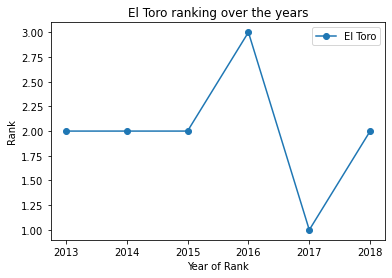

In [13]:
# function that will plot the ranking of a given roller coaster over time
def roller_ranking(coaster_name, park_name, df):
    ranking= df[(df['Name']== coaster_name) &  (df['Park'] == park_name)]
    x= ranking['Year of Rank']
    y= ranking['Rank']
    plt.plot(x, y, marker='o', label= coaster_name)
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
    plt.title(coaster_name + ' ranking over the years')
    plt.legend()
    plt.show()
ax1= plt.subplot()
roller_ranking('El Toro', 'Six Flags Great Adventure', wood)

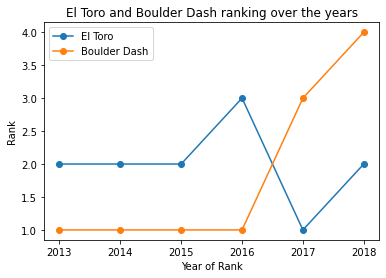

In [14]:
# function that will plot the ranking of a given two roller coasters over time
def roller_ranking(name1, name2, park1, park2, df):
    ranking1= df[(df['Name']== name1) &  (df['Park'] == park1)]
    ranking2= df[(df['Name']== name2) &  (df['Park'] == park2)]
    x= ranking1['Year of Rank']
    
    y= ranking1['Rank']
    y1= ranking2['Rank']
    
    plt.plot(x, y, marker='o', label= name1)
    plt.plot(x, y1, marker='o', label= name2)
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
    plt.title(name1+' and '+ name2+' ranking over the years')
    plt.legend()
    plt.show()
ax2= plt.subplot()
roller_ranking('El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce', wood)

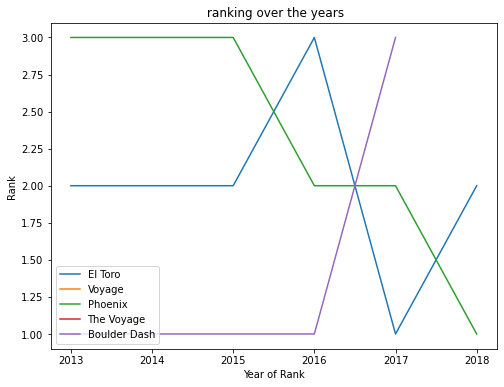

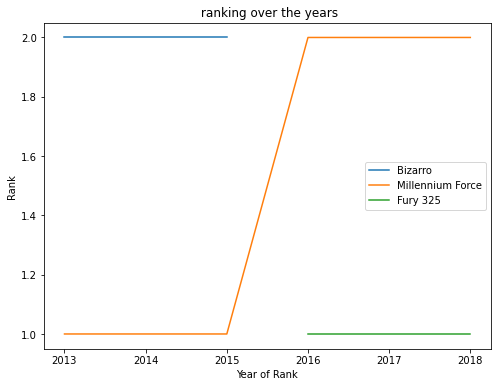

In [15]:
# function that will plot the ranking of the top n ranked roller coasters over time.
def roller_ranking_top_n(n, df):
    top_n_rankings = df[df['Rank'] <= n]
    x= top_n_rankings['Year of Rank']
    y= top_n_rankings['Rank']
    
    plt.figure(figsize=(8, 6))
    ax= plt.subplot()
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
    
    plt.xlabel('Year of Rank')
    plt.ylabel('Rank')
    plt.title(' ranking over the years')
    plt.legend()
    plt.show()

roller_ranking_top_n(3, wood)
roller_ranking_top_n(2, steel)

In [16]:
coasters.head()#inspecting df

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


<class 'numpy.float64'>


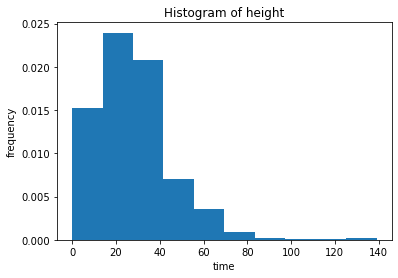

In [17]:
#function that plots a histogram of any numeric column of the roller coasters DataFrame
def create_hist(df, name):
    # to check if the column contains numeric or qualitative information
    
    if type(df[name][0]) == str:
        print("Please make sure the column you enter contains numeric information")
    else:
        if name == 'height':
            df = df[df[name] <= 140] # cut the outliers
            df_new = df.dropna(axis = 0, how = 'any') # drop missing values
        else:
            df_new = df.dropna(axis = 0, how = 'any')
        df_name = df_new[name]
        plt.hist(df_name, density = True)
        plt.xlabel('time')
        plt.ylabel('frequency')
        plt.title('Histogram of ' + name)
        
ax3 = plt.subplots()
create_hist(coasters, 'height')

print(type(coasters['speed'].reset_index()['speed'][0]))

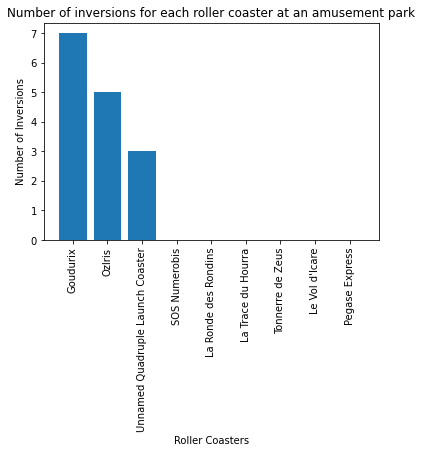

In [38]:
#function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park.
def create_bar(park_name, df):
    park_coasters = df[df['park'] == park_name]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    number_inversions = park_coasters['num_inversions']
    
    ax= plt.subplot()  
    plt.bar(range(len(coaster_names)),number_inversions)
    ax.set_xticks(range(len(coaster_names)))
    ax.set_xticklabels(coaster_names, rotation = 'vertical')
    plt.xlabel('Roller Coasters')
    plt.ylabel('Number of Inversions')
    plt.title('Number of inversions for each roller coaster at an amusement park')
    
create_bar('Parc Asterix', coasters)

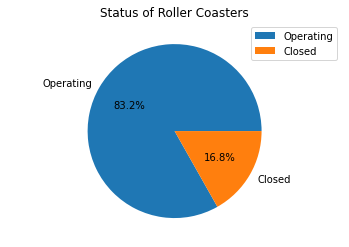

In [48]:
#function that creates a pie chart that compares the number of operating roller coasters to the number of closed roller coasters.
def create_pie(park_name, df):
    park_coasters = df[df['park'] == park_name]
    operating_coasters = df[df['status'] == 'status.operating']
    closed_coasters = df[df['status'] == 'status.closed.definitely']
    status_counts = [len(operating_coasters), len(closed_coasters)]
    ax= plt.subplot()
    plt.axis('equal')
    plt.title('Status of Roller Coasters')
    plt.pie(status_counts, autopct='%0.1f%%', labels= ['Operating','Closed'])
    plt.legend()
create_pie('Parc Asterix', coasters)

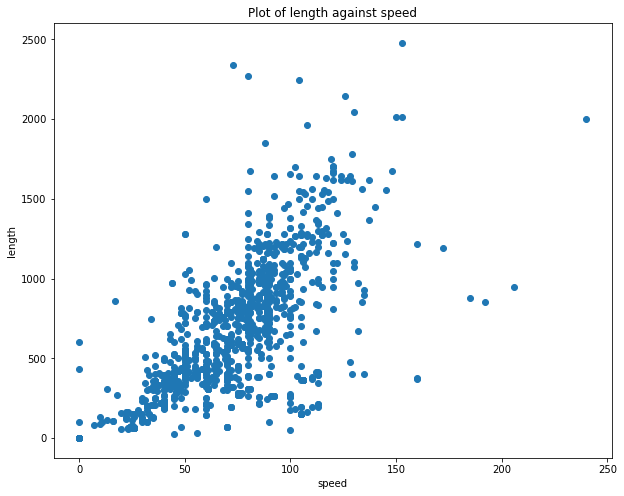

In [53]:
#function that creates a scatter plot of two numeric columns of the roller coaster DataFrame.
def create_scatter(df, name1, name2):
    # first to check if the columns contain numeric information
    if (type(df[name1][0]) == str) or (type(df[name2][0]) == str):
        print("Please make sure the column you enter contains numeric information")
    else:
        if name1 == 'height':
            df = df[df[name1] <= 140] # cut the outliers
            df_new = df.dropna(axis = 0, how = 'any') # drop missing values
        elif name2 == 'height':
            df = df[df[name2] <= 140] # cut the outliers
            df_new = df.dropna(axis = 0, how = 'any') # drop missing values           
        else:
            df_new = df.dropna(axis = 0, how = 'any')
        df_name_one = df_new[name1]
        df_name_two = df_new[name2]
        
        plt.figure(figsize= (10, 8))
        plt.scatter(df_name_one, df_name_two, marker='o')
        plt.xlabel(name1)
        plt.ylabel(name2)
        plt.title('Plot of ' + name2 + " against " + name1)


create_scatter(coasters, 'speed', 'length')   

In [65]:
coasters.head()#inspecting df

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [64]:
popularity = coasters['seating_type'].value_counts()
this_df = coasters['seating_type']
print(popularity)
#plt.figure(figsize=(10, 8))
#plt.pie(popularity, labels = this_df.unique())
#plt.legend()

Sit Down         2217
Spinning          150
Inverted          122
Suspended          55
Alpine             43
na                 40
Water Coaster      29
Floorless          27
Flying             27
Motorbike          21
Stand Up           20
4th Dimension      18
Wing               17
Bobsleigh          11
Pipeline            5
Name: seating_type, dtype: int64


- Sit Down coaster seating type is most popular